In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:

X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Build LSTM Model

In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32611.9375
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 32334.3027
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 32076.5254
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 31823.9375
Epoch 5/300
1/1 [==============================] - 0s 12ms/step - loss: 31594.8066
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 31401.2891
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 31220.7676
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 31014.2285
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 30785.3926
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 30547.9707
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 30291.5254
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 29995.7832
Epoch

Predict for next 10 days data

In [13]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.22992]
1 day input [196.         210.         223.22991943]
1 day output [[233.19643]]
2 day input [210.         223.22991943 233.19642639]
2 day output [[247.23291]]
3 day input [223.22992 233.19643 247.23291]
3 day output [[259.9828]]
4 day input [233.19643 247.23291 259.9828 ]
4 day output [[271.82428]]
5 day input [247.23291 259.9828  271.82428]
5 day output [[286.3022]]
6 day input [259.9828  271.82428 286.3022 ]
6 day output [[299.84326]]
7 day input [271.82428 286.3022  299.84326]
7 day output [[313.71545]]
8 day input [286.3022  299.84326 313.71545]
8 day output [[329.19604]]
9 day input [299.84326 313.71545 329.19604]
9 day output [[344.3568]]
[223.22992, 233.19643, 247.23291, 259.9828, 271.82428, 286.3022, 299.84326, 313.71545, 329.19604, 344.3568]


In [16]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [17]:
len(timeseries_data)

9

In [18]:
lst_output

[223.22992,
 233.19643,
 247.23291,
 259.9828,
 271.82428,
 286.3022,
 299.84326,
 313.71545,
 329.19604,
 344.3568]

Visualizing the Output

In [20]:
import matplotlib.pyplot as plt

In [21]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

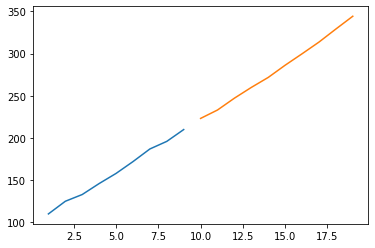

In [22]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)